## Gaon Music 차트 크롤링 & 시각화
### 세부
1. Digital Weekly, Monthly Top 200 차트의 곡별 정보 수집
2. 수집된 데이터를 기반으로, 다양한 기준에 따라 시각화한다.

### 사전 Setting : 필요 라이브러리 임포트

In [4]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

from glob import glob

print('numpy version : ', np.__version__)
print('pandas version : ', np.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version :  1.19.2
pandas version :  1.19.2


In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError
from urllib.request import urlretrieve
from lxml import html

import requests
import re

In [6]:
from selenium import webdriver
from time   import sleep, time
from random import randint

In [8]:
# 전체 year, week 코드 읽어오기
url = 'http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL&targetTime=9&hitYear=2021&termGbn=month'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
year_months = []

for i in range(1, 142):
    tag = soup.select('option')[i]['value']
    year_months.append(tag)
    
year_months

['202109',
 '202108',
 '202107',
 '202106',
 '202105',
 '202104',
 '202103',
 '202102',
 '202101',
 '202012',
 '202011',
 '202010',
 '202009',
 '202008',
 '202007',
 '202006',
 '202005',
 '202004',
 '202003',
 '202002',
 '202001',
 '201912',
 '201911',
 '201910',
 '201909',
 '201908',
 '201907',
 '201906',
 '201905',
 '201904',
 '201903',
 '201902',
 '201901',
 '201812',
 '201811',
 '201810',
 '201809',
 '201808',
 '201807',
 '201806',
 '201805',
 '201804',
 '201803',
 '201802',
 '201801',
 '201712',
 '201711',
 '201710',
 '201709',
 '201708',
 '201707',
 '201706',
 '201705',
 '201704',
 '201703',
 '201702',
 '201701',
 '201612',
 '201611',
 '201610',
 '201609',
 '201608',
 '201607',
 '201606',
 '201605',
 '201604',
 '201603',
 '201602',
 '201601',
 '201512',
 '201511',
 '201510',
 '201509',
 '201508',
 '201507',
 '201506',
 '201505',
 '201504',
 '201503',
 '201502',
 '201501',
 '201412',
 '201411',
 '201410',
 '201409',
 '201408',
 '201407',
 '201406',
 '201405',
 '201404',
 '201403',

In [9]:
# 전체 페이지 읽어오기
# 월간 차트 200, 2010~2021

df = pd.DataFrame()

for i in range(0, 141):
    year = year_months[i][0:4]
    month = year_months[i][4:6]
    URL = 'http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL&targetTime={}&hitYear={}&termGbn=month'.format(month, year)
    R = requests.get(URL)
    soup = BeautifulSoup(R.text, 'html.parser')
    print('{}-{} loading ...'.format(year, month))
    
    for j in range(0, 200):
        rank = soup.select('td.ranking')[j].text
        title = soup.select('td.subject > p')[j*2].text
        artist = (soup.select('td.subject > p.singer')[j].text).split('|')[0]
        album = (soup.select('td.subject > p.singer')[j].text).split('|')[1]
        prod = soup.select('td.production > p.pro')[j].text
        dist = soup.select('td.production > p.dist')[j].text
        gaon = int((soup.select('td.count > p')[j].text).replace(',',''))
        df = df.append(pd.DataFrame([[year, month, rank, title, artist, album, prod, dist, gaon]]))
    print('{}-{} done'.format(year, month))

2021-09 loading ...
2021-09 done
2021-08 loading ...
2021-08 done
2021-07 loading ...
2021-07 done
2021-06 loading ...
2021-06 done
2021-05 loading ...
2021-05 done
2021-04 loading ...
2021-04 done
2021-03 loading ...
2021-03 done
2021-02 loading ...
2021-02 done
2021-01 loading ...
2021-01 done
2020-12 loading ...
2020-12 done
2020-11 loading ...
2020-11 done
2020-10 loading ...
2020-10 done
2020-09 loading ...
2020-09 done
2020-08 loading ...
2020-08 done
2020-07 loading ...
2020-07 done
2020-06 loading ...
2020-06 done
2020-05 loading ...
2020-05 done
2020-04 loading ...
2020-04 done
2020-03 loading ...
2020-03 done
2020-02 loading ...
2020-02 done
2020-01 loading ...
2020-01 done
2019-12 loading ...
2019-12 done
2019-11 loading ...
2019-11 done
2019-10 loading ...
2019-10 done
2019-09 loading ...
2019-09 done
2019-08 loading ...
2019-08 done
2019-07 loading ...
2019-07 done
2019-06 loading ...
2019-06 done
2019-05 loading ...
2019-05 done
2019-04 loading ...
2019-04 done
2019-03 lo

IndexError: list index out of range

- 월간 차트는 2019~2021년은 200위, 2018년부터는 100위까지 제공하여 오류 발생

In [7]:
df

NameError: name 'df' is not defined

In [358]:
df.rename(columns = {0:'year', 1:'month', 2:'rank', 3:'title', 4:'artist', 5:'album', 6:'prod', 7:'dist', 8:'gaon'}, inplace=True)

In [371]:
df_1921 = df[df['year']>='2019']
df_1921['date'] = df_1921['year']+df_1921['month']
df_1921

,year,month,rank,title,artist,album,prod,dist,gaon,date
0,2021,09,1,Stay,"The Kid LAROI, Justin Bieber",Stay,Columbia,Sony Music,128963307,202109
0,2021,09,2,신호등,이무진,신호등,쇼플레이,Kakao Entertainment,111468383,202109
0,2021,09,3,Next Level,aespa,Next Level,SM Entertainment,Dreamus,88103790,202109
0,2021,09,4,바라만 본다,MSG워너비(M.O.M),MSG워너비 1집,유야호,"지니뮤직, Stone Music Entertainment",84085988,202109
0,2021,09,5,Weekend,태연 (TAEYEON),Weekend,SM Entertainment,Dreamus,80214341,202109
...,...,...,...,...,...,...,...,...,...,...
0,2019,01,196,빨간 맛 (Red Flavor),레드벨벳(Red Velvet),The Red Summer - Summer Mini Album,SM Entertainment,Dreamus,14473378,201901
0,2019,01,197,Someone Like You,Adele,21,XL Recordings,강앤뮤직,14425409,201901
0,2019,01,198,The Ocean (Feat. Shy Martin) (Radio Ed...,Mike Perry,The Ocean (Radio Edit),DF Records,Sony Music,14241392,201901
0,2019,01,199,집,Wanna One (워너원),1¹¹=1 (POWER OF DESTINY),"SWING Entertainment, Stone Music Entertainment",지니뮤직,14212472,201901


In [527]:
df_1921.to_excel('C:/gaon_1901-2109.xlsx')

In [374]:
df_1921[df_1921['dist']=='지니뮤직, Stone Music Entertainment']

,year,month,rank,title,artist,album,prod,dist,gaon,date
0,2021,09,4,바라만 본다,MSG워너비(M.O.M),MSG워너비 1집,유야호,"지니뮤직, Stone Music Entertainment",84085988,202109
0,2021,09,12,좋아좋아,조정석,슬기로운 의사생활 시즌2 OST Part 5,"스튜디오 마음C, 에그이즈커밍, Stone Music Entertainment","지니뮤직, Stone Music Entertainment",67541007,202109
0,2021,09,16,헤픈 우연,헤이즈 (Heize),HAPPEN,피네이션,"지니뮤직, Stone Music Entertainment",62536520,202109
0,2021,09,17,비와 당신,이무진,슬기로운 의사생활 시즌2 OST Part 1,"스튜디오 마음C, 에그이즈커밍, Stone Music Entertainment","지니뮤직, Stone Music Entertainment",54369940,202109
0,2021,09,21,비가 오는 날엔 (2021),헤이즈 (Heize),비가 오는 날엔 (2021),PLAYLIST,"지니뮤직, Stone Music Entertainment",49489358,202109
...,...,...,...,...,...,...,...,...,...,...
0,2019,01,162,밤이 되니까,펀치 (Punch),밤이 되니까,냠냠엔터테인먼트,"지니뮤직, Stone Music Entertainment",16901092,201901
0,2019,01,164,POP/STARS,"(여자)아이들, Madison Beer, Jaira Burns",POP/STARS,라이엇 게임즈,"지니뮤직, Stone Music Entertainment",16796097,201901
0,2019,01,175,북향 (Feat. 오혁),다이나믹 듀오 (Dynamic Duo),북향,아메바컬쳐,"지니뮤직, Stone Music Entertainment",16143691,201901
0,2019,01,190,야생화,박효신,야생화,젤리피쉬 엔터테인먼트,"지니뮤직, Stone Music Entertainment",15068647,201901


In [431]:
by_artist = df_1921.groupby('artist').count()['title'].sort_values(ascending=False)

In [433]:
by_artist

artist
방탄소년단                                                                         354
아이유 (IU)                                                                      264
폴킴                                                                            164
볼빨간사춘기                                                                        109
임영웅                                                                           108
                                                                             ... 
보이비, 개코, 최자, 지구인, GRAY(그레이), Crush, 원슈타인, 마미손, 지올팍(Zior Park), 샘김(Sam Kim)      1
보아 (BoA)                                                                        1
백지영, 옹성우                                                                        1
백아연                                                                             1
슈퍼주니어 (Super Junior)                                                            1
Name: title, Length: 504, dtype: int64

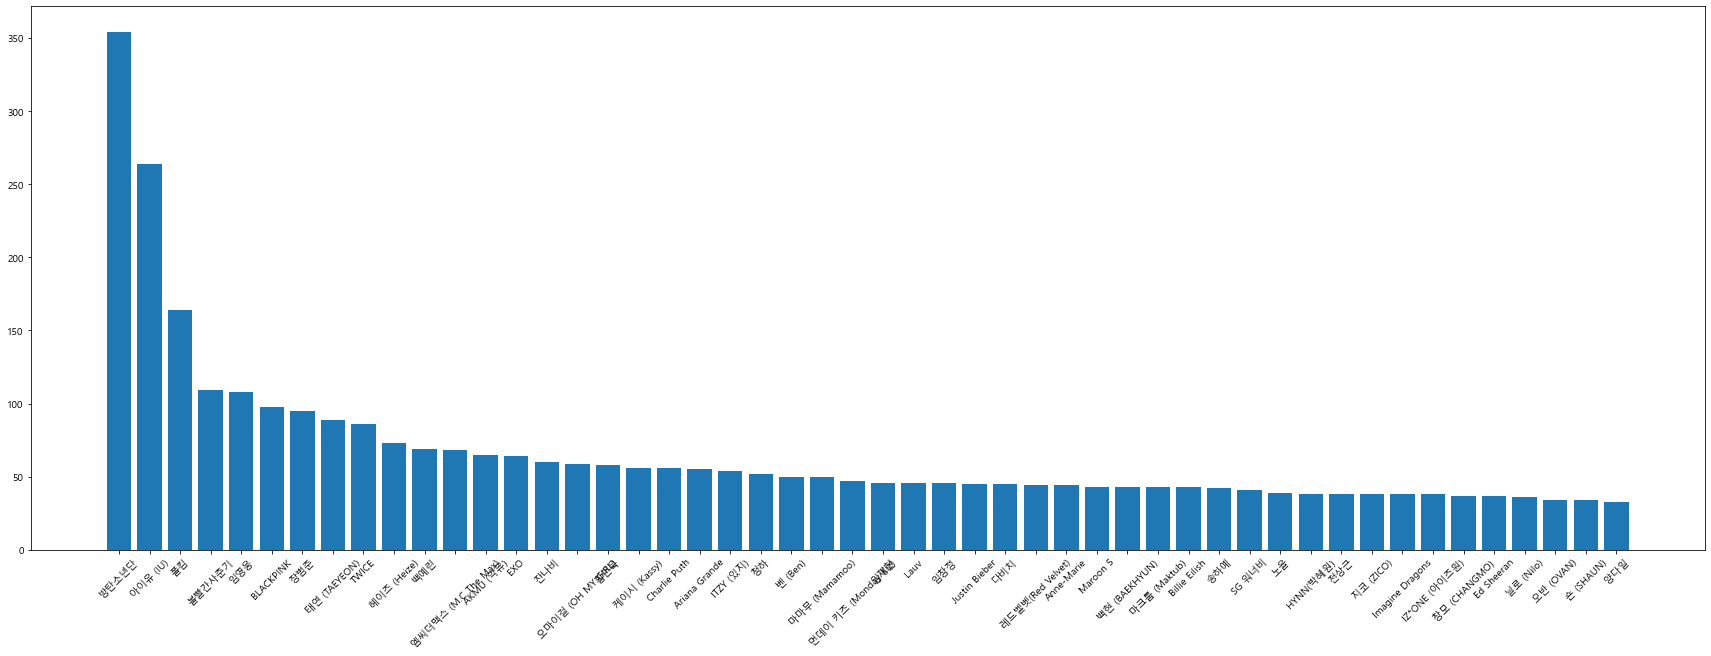

In [434]:
plt.figure(figsize=(30,10))
plt.bar(by_artist[0:50].index, by_artist[0:50].values)
plt.xticks(rotation=45)
plt.show()

In [437]:
by_dist = df_1921.groupby(['date','dist']).count()

In [447]:
by_dist = by_dist.reset_index().set_index('date')

In [483]:
by_dist

,dist,year,month,rank,title,artist,album,prod,gaon
date,,,,,,,,,
201901,Dreamus,33,33,33,33,33,33,33,33
201901,Kakao Entertainment,58,58,58,58,58,58,58,58
201901,NHN벅스,4,4,4,4,4,4,4,4
201901,Sony Music,10,10,10,10,10,10,10,10
201901,Stone Music Entertainment,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
202109,음악형제들,1,1,1,1,1,1,1,1
202109,인터파크,2,2,2,2,2,2,2,2
202109,지니뮤직,13,13,13,13,13,13,13,13


In [490]:
by_dist[by_dist['dist']=='지니뮤직, Stone Music Entertainment']['title']

date
201901    12
201902    10
201903     8
201904     5
201905     7
201906     8
201907     9
201908    13
201909    15
201910     9
201911     8
201912    12
202001    14
202002    13
202003    15
202004    15
202005    21
202006    23
202007    23
202008    21
202009    19
202010    16
202011    13
202012    13
202101    16
202102    16
202103    14
202104     8
202105    18
202106    18
202107    23
202108    29
202109    35
Name: title, dtype: int64

In [3]:
plt.figure(figsize=(20,10))
plt.title("유통사별 Digital 음원 M/S", fontsize=15)
plt.plot(by_dist[by_dist['dist']=='지니뮤직, Stone Music Entertainment']['title'].index, by_dist[by_dist['dist']=='지니뮤직, Stone Music Entertainment']['title'].values)
plt.legend(fontsize=13)
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

In [2]:
df_grouped = df_1921.groupby(['date','dist','artist']).count()
df_grouped = df_grouped['title']
df_grouped = df_grouped.reset_index()
df_stone = df_grouped[df_grouped['dist']=='지니뮤직, Stone Music Entertainment']
df_stone_pivot = df_stone.pivot(index='date', columns='artist', values='title')
df_stone_pivot = df_stone_pivot.fillna(0)
df_stone_pivot

NameError: name 'df_1921' is not defined

### 피지컬 음반 차트 스크래핑

In [537]:
# 전체 date 코드 읽어오기
months = ['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02', '01']
years = ['2021', '2020', '2019']
dates = []

for year in years:
    for month in months:
        date = '{}{}01'.format(year, month)
        if date < '20211001' : # 현재 월의 첫날로 세팅
            dates.append(date) 
        else :
            pass
    
dates

['20210901',
 '20210801',
 '20210701',
 '20210601',
 '20210501',
 '20210401',
 '20210301',
 '20210201',
 '20210101',
 '20201201',
 '20201101',
 '20201001',
 '20200901',
 '20200801',
 '20200701',
 '20200601',
 '20200501',
 '20200401',
 '20200301',
 '20200201',
 '20200101',
 '20191201',
 '20191101',
 '20191001',
 '20190901',
 '20190801',
 '20190701',
 '20190601',
 '20190501',
 '20190401',
 '20190301',
 '20190201',
 '20190101']

In [544]:
# 전체 페이지 읽어오기
#  리테일 차트 Monthly 200, 2010~2021

df = pd.DataFrame()

for date in dates:
    URL = 'http://gaonchart.co.kr/main/section/chart/retail.gaon?time_type=month&findKey=Select&startDate={}'.format(date)
    R = requests.get(URL)
    soup = BeautifulSoup(R.text, 'html.parser')
    print('{} loading ...'.format(date))
    
    for j in range(0, 49):
        rank = soup.select('td.ranking ')[j].text
        album = soup.select('td.subject > p')[j*2].text
        artist = (soup.select('td.subject > p.singer')[j].text).split('|')[0]
        dist = soup.select('td.production > p.dist')[j].text
        sales = int((soup.select('td.count > p')[j].text).replace(',',''))
        df = df.append(pd.DataFrame([[date, rank, album, artist, dist, sales]]))
    print('{} done'.format(date))
print('complete')

20210901 loading ...


IndexError: list index out of range

In [559]:
R = requests.get('http://gaonchart.co.kr/main/section/chart/retail.gaon?time_type=month&findKey=Select&startDate=20210801')
soup = BeautifulSoup(R.text, 'html.parser')

In [560]:
soup.select('td.count')

[]

In [1]:
df_stone_pivot.to_csv('df_stone_1921.csv', encoding='cp949')

NameError: name 'df_stone_pivot' is not defined